In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("injuries_2010-2020.csv",parse_dates=[0])

In [ ]:
print(data.info())
print(data.columns)
data.describe()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27105 entries, 0 to 27104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          27105 non-null  datetime64[ns]
 1   Team          27103 non-null  object        
 2   Acquired      9542 non-null   object        
 3   Relinquished  17560 non-null  object        
 4   Notes         27105 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.0+ MB
None
Index(['Date', 'Team', 'Acquired', 'Relinquished', 'Notes'], dtype='object')


<ipython-input-4-1d25f8d1bd3e>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...


In [ ]:
injuries = data[data.Team.notnull()]

In [ ]:
list(set(injuries['Acquired'].values))
list(set(injuries['Relinquished'].values))
noEmptyValuesInAcquired= injuries[injuries.Acquired.notnull()]
list(set(noEmptyValuesInAcquired['Notes'].values))
noEmptyValuesInRelinquished= injuries[injuries.Relinquished.notnull()]
list(set(noEmptyValuesInRelinquished['Notes'].values))

['placed on IL with bruised lumbar spine',
 'placed on IL with dislocated left shoulder',
 'surgery to repair fractured right thumb (out indefinitely)',
 'sprained MCL in left knee (DNP) (F)',
 'placed on IL with foot injury / left knee injury (P)',
 'placed on IL with right thumb injury (surgery)',
 'placed on IL with Achilles tendon injury',
 'sprained right wrist (DTD)',
 'placed on IL with tightness in right calf',
 'placed on IL with Achilles injury / sprained ankle / illness',
 'sprained left ankle (out for season)',
 'sprained MCL in left knee (DTD)',
 'sprained left foot (DTD)',
 'placed on IL with returned to lineup',
 'strained left quadriceps (DTD)',
 'torn ACL in left knee (DNP)',
 'placed on IL with fractured right wrist (surgery) (out for season)',
 'sprained MCL in left knee (out for season)',
 'left knee patellar tendinitis (DTD)',
 'bruised right shin (DTD)',
 'placed on IL with respiratory ailment',
 'back spasms (out indefinitely)',
 'placed on IL with right knee inj

In [ ]:
newDatasetInjuries = injuries[injuries.Relinquished.notnull()]
newDatasetInjuries=newDatasetInjuries.drop(['Acquired'],axis=1)
newDatasetInjuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17558 entries, 0 to 27102
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          17558 non-null  datetime64[ns]
 1   Team          17558 non-null  object        
 2   Relinquished  17558 non-null  object        
 3   Notes         17558 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 685.9+ KB


In [ ]:
newDatasetInjuries['season'] = pd.DatetimeIndex(newDatasetInjuries['Date']).year
newDatasetInjuries.head()

,Date,Team,Relinquished,Notes,season
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010
2,2010-10-06,Pistons,Terrico White,broken fifth metatarsal in right foot (out ind...,2010
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010
4,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2010


<ipython-input-9-88891308694a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='season',data=newDatasetInjuries,palette='Set2',order=newDatasetInjuries.season.value_counts().iloc[:].index)


<Axes: xlabel='count', ylabel='season'>

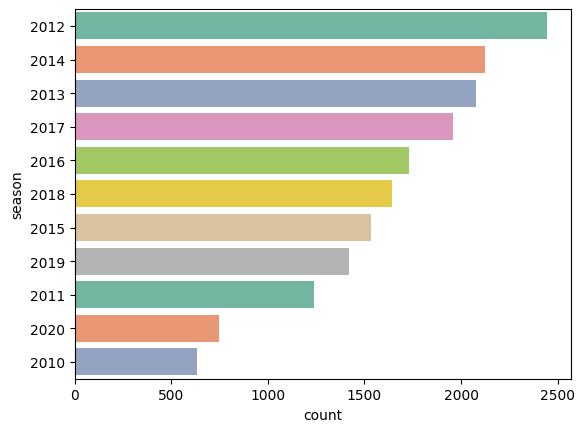

In [ ]:
import seaborn as sns
sns.countplot(y='season',data=newDatasetInjuries,palette='Set2',order=newDatasetInjuries.season.value_counts().iloc[:].index)

In [ ]:
# Assuming 'Date' column is in datetime format
newDatasetInjuries['season'] = pd.DatetimeIndex(newDatasetInjuries['Date']).year

# Grouping by 'season' and counting the number of injuries for each season
injuries_per_season = newDatasetInjuries.groupby('season').size().reset_index(name='injury_count')

# Displaying the result
print(injuries_per_season)

    season  injury_count
0     2010           636
1     2011          1237
2     2012          2444
3     2013          2078
4     2014          2125
5     2015          1533
6     2016          1733
7     2017          1960
8     2018          1645
9     2019          1420
10    2020           747


In [ ]:
unique_injuries_per_player = newDatasetInjuries.groupby('Relinquished')['Notes'].agg(pd.Series.unique).reset_index(name='unique_injuries')

# Displaying the result
print(unique_injuries_per_player)

            Relinquished                                    unique_injuries
0             Mike Scott  [placed on IL, placed on IL with back injury, ...
1            Tony Parker  [strained left calf muscle (out indefinitely),...
2                  76ers                                     [placed on IL]
3           A.J. Hammons          [placed on IL, placed on IL with illness]
4             A.J. Price  [placed on IL, strep throat (DNP), fractured r...
...                  ...                                                ...
1151       Zaza Pachulia  [illness (DTD), placed on IL with illness, sor...
1152        Zhaire Smith  [placed on IL with surgery on left foot, place...
1153     Zion Williamson  [torn meniscus in right knee (out indefinitely...
1154        Zoran Dragic                                     [placed on IL]
1155  Zydrunas Ilgauskas   [placed on IL with foot infection, placed on IL]

[1156 rows x 2 columns]


In [2]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label']
  ))])

fig.update_layout(
    hovermode = 'x',
    title="Injury Data in the NBA",
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()

In [3]:
import plotly.graph_objects as go

# Define your own data
node_labels = ["Not Injured", "Injured", "No Significant Injury", "Significant Injury", "Returned", "Not Returned"]
node_colors = ["blue", "red", "green", "yellow", "orange", "purple"]
link_source = [0, 0, 1, 1, 3]
link_target = [1, 3, 2, 3, 4]
link_value = [100, 50, 30, 20, 25]
link_label = ["", "", "", "", ""]

fig = go.Figure(data=[go.Sankey(
    valueformat=".0f",
    valuesuffix="Players",
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        label=link_label
    ))])

fig.update_layout(
    hovermode='x',
    title="Injury Data in the NBA",
    font=dict(size=10, color='white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()


In [88]:
import plotly.graph_objects as go

# Define your own data
node_labels = ["All NBA Players", "Injured", "Not Injured",
               "Slight Injury", "Minor Injury", "Moderate Injury", "Severe Injury",
               "Return", "Rehabilitation","Optimal Performance","Low Performance","No Return"]
node_colors = ["#00B4D8",
               "#ff006e", "#ffea00",
               "#E0B1CB", "#C77DFF", "#7B2CBF", "#3C096C",
               "#ffc300", "#FF9100",
               "#d8572a","#ae2012","#5f0f40"]
link_source = [0, 0, 1, 1, 1, 1, 1, 3, 6, 5, 4,8,8,8]
link_target = [1, 2, 3, 4, 5, 6, 7, 7, 8, 7, 7,11,10,9]
link_value = [75, 100, 30, 20, 15, 10, 0, 30, 10, 15, 20,4,4,4]  # Adjusted values
link_label = ["", "", "", "", "", "", "", "Return", "", "Rehab", ""]

fig = go.Figure(data=[go.Sankey(
    valueformat=".0f",
    valuesuffix="Players",
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        label=link_label
    ))])

fig.update_layout(
    hovermode='x',
    title="Injury Data in the NBA",
    font=dict(size=13, color='white'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    annotations=[
        dict(
            text="Subtitle: Additional information here",
            x=0,
            y=1.05,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12),
        ),
        dict(
            text="sources: fill in",
            x=0,
            y=-0.2,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12),
        )
    ]
)

fig.show()


In [95]:
import plotly.graph_objects as go

# Define your own data
node_labels = ["All NBA Players", "Injured", "Not Injured",
               "Slight Injury", "Minor Injury", "Moderate Injury", "Severe Injury",
               "Return", "Rehabilitation","Optimal Performance","Low Performance","No Return"]
node_colors = ["#00B4D8",
               "#b2ff9e", "#ffea00",
               "#E0B1CB", "#C77DFF", "#7B2CBF", "#3C096C",
               "#ffc300", "#FF9100",
               "#d8572a","#ae2012","#5f0f40"]
link_source = [0, 0, 1, 1, 1, 1, 1, 3, 6, 5, 4,8,8,8]
link_target = [1, 2, 3, 4, 5, 6, 7, 7, 8, 7, 7,11,10,9]
link_value = [75, 100, 30, 20, 15, 10, 0, 30, 10, 15, 20,4,4,4]  # Adjusted values
link_label = ["", "", "", "", "", "", "", "Return", "", "Rehab", ""]

fig = go.Figure(data=[go.Sankey(
    valueformat=".0f",
    valuesuffix="Players",
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        label=link_label
    ))])

fig.update_layout(
    hovermode='x',
    title="Injury Data in the NBA",
    font=dict(size=13, color='white'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    annotations=[
        dict(
            text="Subtitle: Additional information here",
            x=0,
            y=1.05,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12),
        ),
        dict(
            text="sources: fill in",
            x=0,
            y=-0.2,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12),
        )
    ]
)

fig.show()

In [94]:
import plotly.graph_objects as go

# Define your own data
node_labels = ["All NBA Players", "Injured", "Not Injured",
               "Slight Injury", "Minor Injury", "Moderate Injury", "Severe Injury",
               "Return", "Rehabilitation","Optimal Performance","Low Performance","No Return"]
node_colors = ["#00B4D8",
               "#023E8A", "#3a86ff",
               "#E0B1CB", "#C77DFF", "#7B2CBF", "#3C096C",
               "#ffea00",  "#FF9100",
               "#d8572a","#ae2012","#5f0f40"]
link_source = [0, 0, 1, 1, 1, 1, 1, 3, 6, 5, 4,8,8,8]
link_target = [1, 2, 3, 4, 5, 6, 7, 7, 8, 7, 7,11,10,9]
link_value = [75, 100, 30, 20, 15, 10, 0, 30, 10, 15, 20,4,4,4]  # Adjusted values
link_label = ["", "", "", "", "", "", "", "Return", "", "Rehab", ""]

fig = go.Figure(data=[go.Sankey(
    valueformat=".0f",
    valuesuffix="Players",
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        label=link_label
    ))])

fig.update_layout(
    hovermode='x',
    title="Injury Data in the NBA",
    font=dict(size=13, color='white'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    annotations=[
        dict(
            text="Subtitle: Additional information here",
            x=0,
            y=1.05,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12),
        ),
        dict(
            text="sources: fill in",
            x=0,
            y=-0.2,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12),
        )
    ]
)

fig.show()

In [141]:
import plotly.graph_objects as go

# Define your own data
node_labels = ["All NBA Players", "Injured", "Not Injured",
               "Slight Injury", "Minor Injury", "Moderate Injury", "Severe Injury",
               "Return", "Rehabilitation","Optimal Performance","Low Performance","No Return"]
node_colors = ["#00B4D8",
               "#ff006e", "#ffea00",
               "#E0B1CB", "#C77DFF", "#7B2CBF", "#3C096C",
               "#ffc300", "#FF9100",
               "#d8572a","#ae2012","#5f0f40"]
link_source = [0, 0, 1, 1, 1, 1, 1, 3, 6, 5, 4,8,8,8]
link_target = [1, 2, 3, 4, 5, 6, 7, 7, 8, 7, 7,11,10,9]
link_value = [75, 100, 30, 20, 15, 10, 0, 30, 10, 15, 20,4,4,4]  # Adjusted values
link_label = ["", "", "", "", "", "", "", "Return", "", "Rehab", ""]

fig = go.Figure(data=[go.Sankey(
    valueformat=".0f",
    valuesuffix="Players",
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        label=link_label
    ))])

fig.update_layout(
    hovermode='x',
    title="Injury Process in the NBA",
    font=dict(size=13, color='white'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    annotations=[
        dict(
            text="Fact1: Injury vs noninjury",
            x=0.5,
            y=0.9,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12),
        ),
        dict(
            text="Fact2: injury differences",
            x=0.76,
            y=0.45,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12),
        ),
        dict(
            text="Fact3: performance differences",
            x=0.95,
            y=-0.1,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12),
        ),
        dict(
            text="sources:\nhttps://www.kaggle.com/datasets/ghopkins/nba-injuries-2010-2018/data",
            x=0,
            y=-0.15,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12)
        ),
        dict(
            text="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9802060/",
            x=0.05,
            y=-0.2,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12)
        )
    ]
)

fig.show()


In [143]:
import plotly.graph_objects as go

# Define your own data
node_labels = ["All NBA Players", "Injured", "Not Injured",
               "Slight Injury", "Minor Injury", "Moderate Injury", "Severe Injury",
               "Return", "Rehabilitation","Optimal Performance","Low Performance","No Return"]
node_colors = ["#00B4D8",
               "#ff006e", "#ffea00",
               "#E0B1CB", "#C77DFF", "#7B2CBF", "#3C096C",
               "#ffc300", "#FF9100",
               "#d8572a","#ae2012","#5f0f40"]
link_source = [0, 0, 1, 1, 1, 1, 1, 3, 6, 5, 4,8,8,8]
link_target = [1, 2, 3, 4, 5, 6, 7, 7, 8, 7, 7,11,10,9]
link_value = [75, 100, 30, 20, 15, 10, 0, 30, 10, 15, 20,4,4,4]  # Adjusted values
link_label = ["", "", "", "", "", "", "", "Return", "", "Rehab", ""]

fig = go.Figure(data=[go.Sankey(
    valueformat=".0f",
    valuesuffix="Players",
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        label=link_label
    ))])

fig.update_layout(
    hovermode='x',
    title="Injury Process in the NBA",
    font=dict(size=13, color='white'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    annotations=[
        dict(
            text="sources:\nhttps://www.kaggle.com/datasets/ghopkins/nba-injuries-2010-2018/data",
            x=0,
            y=-0.15,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12)
        ),
        dict(
            text="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9802060/",
            x=0.05,
            y=-0.2,
            showarrow=False,
            xref="paper",
            yref="paper",
            font=dict(color="white", size=12)
        )
    ]
)

fig.show()
